# Analyzing the Survival of Titanic Passengers(CodSoft Internship Program)

* Name - Rajat Subhra Saha

## Introduction

* Titanic, launched on May 31, 1911, and set sail on its maiden voyage from Southampton on April 10, 1912, with 2,240 passengers and crew on board. On April 15, 1912, after striking an iceberg, Titanic broke apart and sank to the bottom of the ocean, taking with it the lives of more than 1,500 passengers and crew.

## Problem Statement

* We have sample data listing passengers who survived or did not survive in Titanic disaster.Based on a given test data, we have to find or analyze Survial of a passengers depending on any column or not and if depending then which columns are more responsible for that.

## Source of Dataset

* We collected the dataset from Kaggle.com

## Size of Dataset

* Size of Titanic dataset is 61.19 kB

## About the Dataset

* Titanic Dataset contains a sample of data giving an overview of the passengers who survived or did not survive during Titanic disater.
* Dataset contains 12 columns namely - 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'

## Libraries Used
* Numpy
* Pandas
* Matplotlib
* Seaborn
* Sklearn

## Missing values
* There are missing data in the columns Age, Cabin and Embarked.
* We will drop Column Cabin as 77% of data is missing.
* We will drop column Ticket as there are different types of data
* We will drop Name column as there is no correlation of Name column with survived column.
* We will replace missing values of Age column with Median of Age column as missing data is less than 50%.
* We will drop remaining missing values row wise.
## Duplicate values
* There are no duplicate values in this dataset

## Categories
* In this dataset, we have both categorical and non-categorical features.
* Categorical Columns
    * Features Sex and Survived has two possible values
    * Feature Embarked and Pclass has three possible values
* Non-Categorical Columns
    * PassengerId,Age,Name,Sibsp,Parch,Cabin,Ticket,Fare

## Overview of the Features

* Survived- Shows whether a particular passenger survived or not. It contains binary data where 0- Not survived and 1- Survived.

* Pclass- The passengers could opt from three distinct classes, namely class-1, class-2, class-3. 

* Sex- This feature tells about the percentage of Male and female passengers. The percentage of female survivors was higher than the number of male survivors. 

* Age -This feature gives us an overview of Age range of all the passengers.

* SibSp- SibSp is the number of siblings or spouse of a person onboard. A maximum of 8 siblings and spouses traveled along with one of the traveler. 

* Parch-Similar to the SibSp, this feature contains number of parents/children the passengers are travelling with.

* Fare- Fare that passengers paid for tickets.

* Embarked- Embarked implies where the traveler mounted from. There are three possible values for Embark — Southampton, Cherbourg, and Queenstown. More than 70% of the people boarded from Southampton. Just under 20% boarded from Cherbourg and the rest boarded from Queenstown.

## Handling Categorical Data
* Checked number of unique values for each category in columns Age and Embarked.
* Count of Q values is very less -3 . So I dropped Q values from Embarked column                              

## Encoding
* Since the string data does not go well with the machine learning algorithms, I needed to convert the non-numeric data to numeric data.
* I have replaced remaining categories of Embarked column with 0 and 1.S=0 and C=1.

* Replaced catgory in Sex column with 0 and 1.Male=0 Female=1

## Dropping columns

## Prediction Algorithm used:
#### Logistic Regression
#### Decision tree Classifier

## Data Preprocessing

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,confusion_matrix 
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df=pd.read_csv('Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.shape

(891, 12)

In [8]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
391,392,1,3,"Jansson, Mr. Carl Olof",male,21.0,0,0,350034,7.7958,NaN,S
242,243,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,10.5000,NaN,S
331,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C


## Various features in Titanic dataset

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Type of each feature in dataset

In [10]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Checking values of each column

In [11]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [12]:
df['PassengerId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [13]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [14]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [15]:
df['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [16]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [17]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [18]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [19]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [20]:
df['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [21]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [22]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

## Checking Missing values

In [23]:
df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

## Handling missing values and duplicates

### Dropping the columns Cabin,ticket,name

In [24]:
df.drop(['Cabin','Ticket','Name'],axis=1,inplace=True)

* Dropped the columns that I did not need for the prediction.
* I dropped columns Cabin, Name, PassengerId and Ticket.

## Replacing missing values of Age column with median

In [25]:
df['Age'].fillna(df['Age'].median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

## Dropping missing values row wise

In [26]:
df.dropna(axis=0,inplace=True)

## Handling Missing Data

* Cabin- As the column ‘Cabin’ had a lot of missing data- around 77%. So I decided to drop the column.

* Age- As Age column had 19% missing data. So I replaced the missing values of Age column with Median of Age.

* Embarked column had 0.23% of missing data. So to handle this,I dropped remianing missing data of the entire dataframe rowwise

## Checking missing values

In [27]:
df.isnull().sum()/len(df)*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Embarked       0.0
dtype: float64

## Checking duplicate values

In [28]:
df.duplicated().sum()

0

## Below are the Remaining columns after handling missing values.

In [29]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

### Handling Categorical columns
* Replace values of Sex column with 0 and 1
    * Male=0 Female=1
* Checking value count of column Embarked
     * Q value is very less, no we drop Q values from Column Embarked
    
     * Replace remaining values of Embarked column with 0 and 1
     * S=0 C=1

In [30]:
df['Sex']=df['Sex'].replace({'male':0,'female':1})

## Checking percentage of each value in column Embarked

In [31]:
df['Embarked'].value_counts(normalize=True)*100

Embarked
S    77.808989
C    18.258427
Q     3.932584
Name: proportion, dtype: float64

## Dropping Embarked column value Q

In [32]:
df.drop(df[df['Embarked']=='Q'].index,inplace=True)

## Replacing values of Embarked column with 0 and 1

In [33]:
df['Embarked']=df['Embarked'].replace({'S':0,'C':1})

In [34]:
df.drop('PassengerId',axis=1,inplace=True)

In [35]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

# Exploratory Data Analysis

## 1.Survival rate of Passengers based on number of Sibling/Spouse

In [36]:
df[['SibSp', 'Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.533333
2,2,0.458333
0,0,0.369710
3,3,0.333333
4,4,0.214286
5,5,0.000000


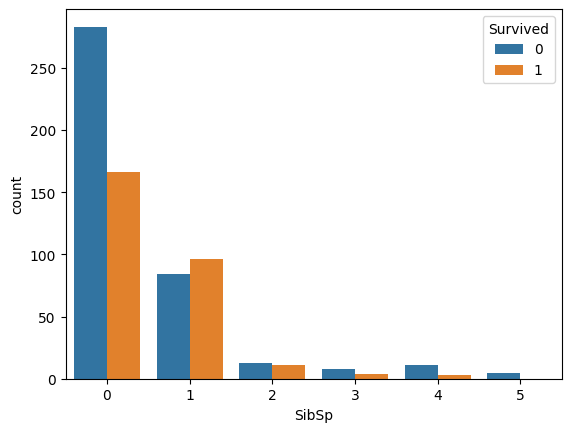

In [37]:
sns.countplot(x=df['SibSp'], hue=df['Survived'])
plt.show()

* From the above graph, we can conclude that passengers having 5 siblings has 0 survival rate whereas Passenger having 1 sibling has highest survival rate.

## 2.Relation between Parents children and Survived column

In [38]:
df[['Parch', 'Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.586538
2,2,0.573529
0,0,0.353414
5,5,0.250000
4,4,0.000000
6,6,0.000000


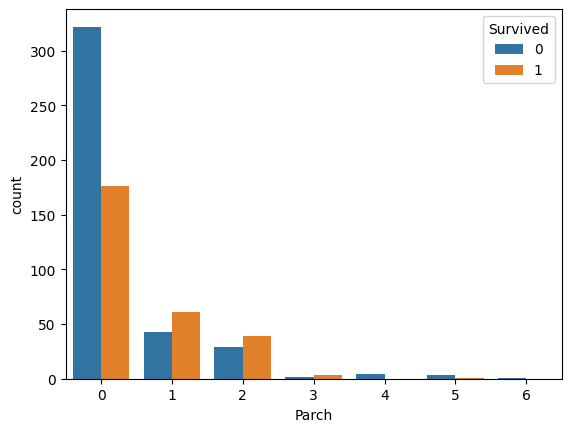

In [39]:
sns.countplot(x=df['Parch'],hue=df['Survived'])
plt.show()

* Passengers travelling with less number of family members has higher survival rate and vice versa.

## 3.No of passengers survived

In [40]:
df['Survived'].value_counts(normalize=True)*100

Survived
0    59.064327
1    40.935673
Name: proportion, dtype: float64

* Around 41% of passengers survived and 59% passengers did not survive

## 4.Survival rate of Male and Female

In [41]:
df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived')

,Sex,Survived
0,0,0.210526
1,1,0.761134


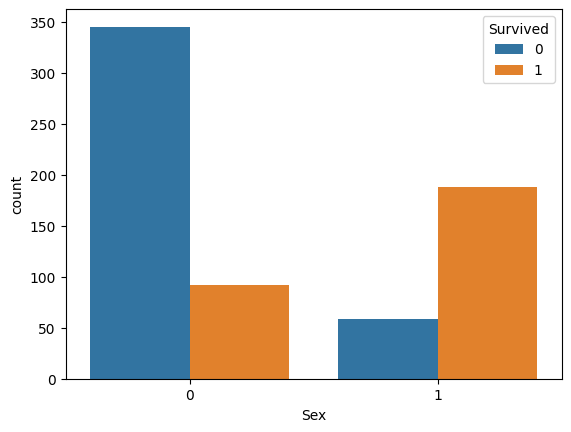

In [42]:
sns.countplot(x=df['Sex'],hue=df['Survived'])
plt.show()

* From the above graph we can conclude that Survival rate of Female passengers is more than Male passengers

## 5.Which Pclass passengers has maximum survival

In [43]:
df[['Pclass', 'Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.653846
1,2,0.479532
2,3,0.238671


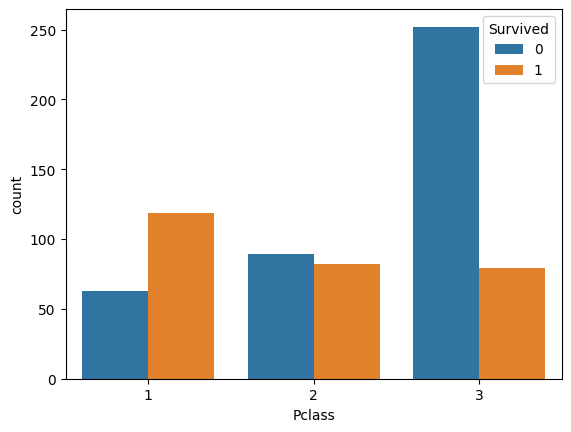

In [44]:
sns.countplot(x=df['Pclass'],hue=df['Survived'])
plt.show()

* From the above graph, we can see that Passengers of Class 1 has highest survival rate.

## 6.Relation between Embarked and Survived column

In [45]:
df[['Embarked', 'Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
1,1,0.607692
0,0,0.362816


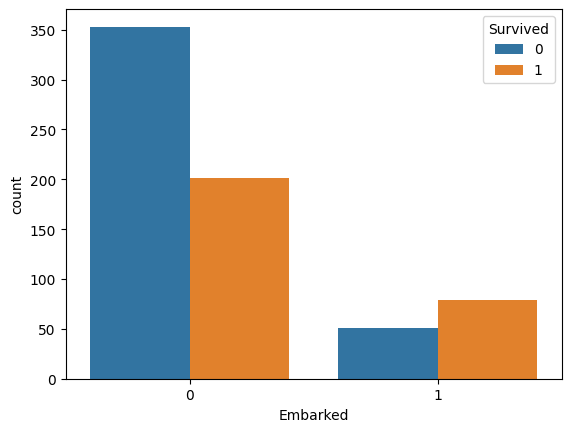

In [46]:
sns.countplot(x=df['Embarked'], hue=df['Survived'])
plt.show()

* From the above graph, we can see the survival rate of passengers who boarded from Southampton is less than passengers who boarded from Cherbourg.

## 7.Relation between Fare and Survived columns

In [47]:
fare_survived=df[['Fare', 'Survived']].groupby(['Fare'],as_index=False).mean().sort_values(by='Survived', ascending=False)
fare_survived

,Fare,Survived
210,512.3292,1.0
168,65.0000,1.0
160,56.9292,1.0
161,57.0000,1.0
162,57.9792,1.0
...,...,...
86,16.1000,0.0
89,17.8000,0.0
90,18.0000,0.0
95,20.2125,0.0


<Axes: xlabel='Fare', ylabel='Survived'>

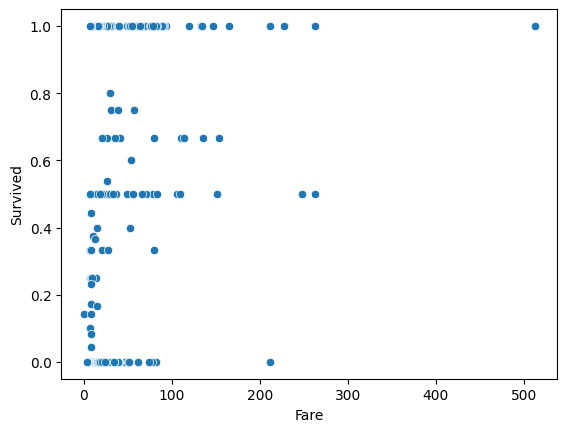

In [48]:
sns.scatterplot(x='Fare',y='Survived',data=fare_survived)

## 8.Relation between Passenger Class and Fare

In [49]:
df[['Pclass', 'Fare']].groupby(['Pclass'],as_index=False).mean()

,Pclass,Fare
0,1,88.026672
1,2,21.578241
2,3,13.261957


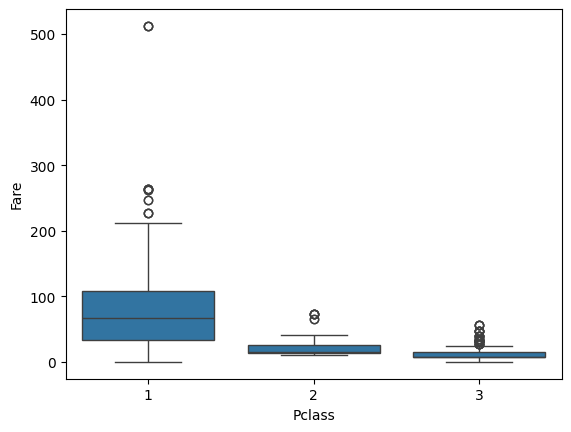

In [50]:
sns.boxplot(x='Pclass',y='Fare',data=df)
plt.show()

* From the above graph, we can see that Fare of Passenger Class 1 is highest

## 9.Relation between Fare and Embarked columns

In [51]:
d3=df[['Embarked', 'Fare']].groupby(['Embarked'],as_index=False).mean()
d3

,Embarked,Fare
0,0,27.476284
1,1,68.296767


* From above, we can see average fare of Southampton is lower than Cherbourg

## 10.Embarked - count male female-groupby

In [52]:
d4=df[['Embarked','Sex']].groupby('Embarked').value_counts()
d4

Embarked  Sex
0         0      368
          1      186
1         0       69
          1       61
Name: count, dtype: int64

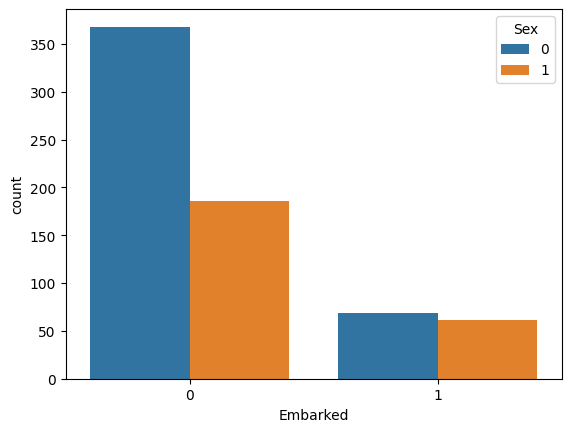

In [53]:
sns.countplot(x='Embarked',hue='Sex', data=df)
plt.show()

* From above graph we can see that number of Passenger who boarded the ship from Embarked value Southampton is more than Cherbourg.
* No of male is more than Female for both Southampton  and Cherbourg.

## 11.Pclass- count male female-groupby

In [54]:
df[['Pclass','Sex']].groupby('Pclass').value_counts()

Pclass  Sex
1       0      100
        1       82
2       0       98
        1       73
3       0      239
        1       92
Name: count, dtype: int64

* From above we can see that number of males passengers is more number of female passengers in all the classes.

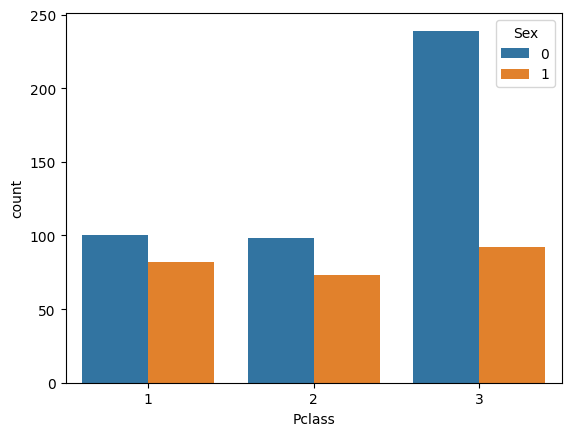

In [55]:
sns.countplot(x='Pclass',hue='Sex',data=df)
plt.show()

* From the above we can see that number of Male passengers in Pclass 1 is 100 and female passengers is 82.
* In Pclass 2, count of Male passengers is 98 and female passengers is 73.
* In Pclass 3, count of Male passengers is 239 and female passengers is 92.

## 12.Pclass- Passengers Average age based on Pclass

In [56]:
df[['Pclass','Age']].groupby('Pclass').mean()

,Age
Pclass,
1,38.101209
2,29.718304
3,25.082840


<Axes: xlabel='Pclass'>

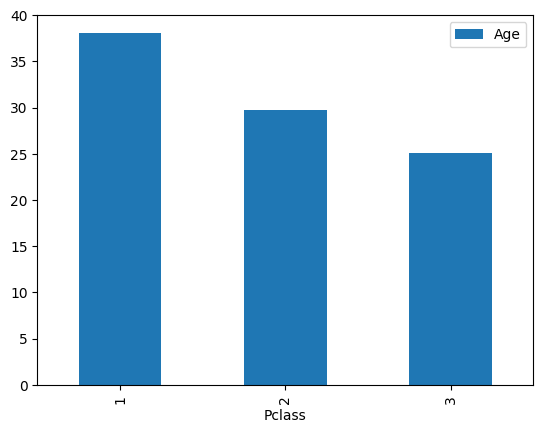

In [57]:
df[['Pclass','Age']].groupby('Pclass').mean().plot(kind='bar')

## 13.Pclass average age of passengers based on each Pclass and gender and survival rate

In [58]:
survival_rate=df.groupby(['Pclass','Sex','Survived'])['Age'].mean()
survival_rate

Pclass  Sex  Survived
1       0    0           44.591667
             1           36.248000
        1    0           25.666667
             1           34.582278
2       0    0           33.084337
             1           16.022000
        1    0           36.000000
             1           28.052239
3       0    0           27.202970
             1           22.092432
        1    0           23.390000
             1           19.535714
Name: Age, dtype: float64

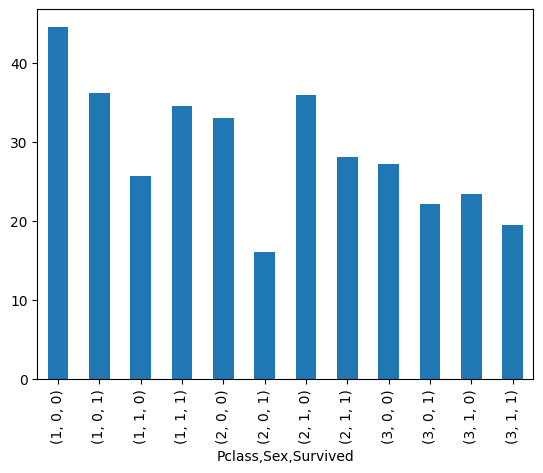

In [59]:
survival_rate.plot(kind='bar')
plt.show()

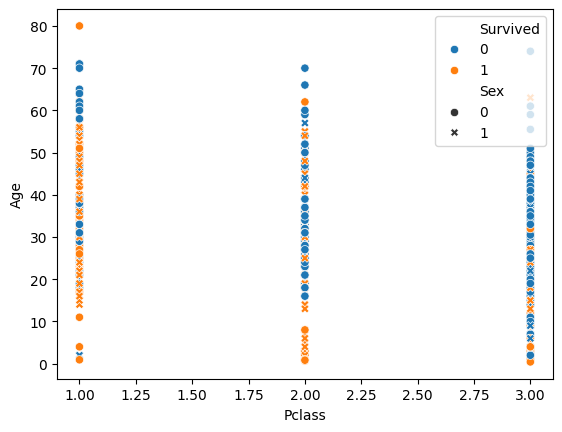

In [60]:
sns.scatterplot(x='Pclass',y='Age',data=df,hue='Survived',style='Sex',sizes=(15,200))
plt.show()

## 14.Pclass average age of passengers based on each Pclass and gender

In [61]:
df.groupby(['Pclass','Sex'])['Age'].mean()

Pclass  Sex
1       0      41.254200
        1      34.256098
2       0      30.472755
        1      28.705479
3       0      26.411799
        1      21.630435
Name: Age, dtype: float64

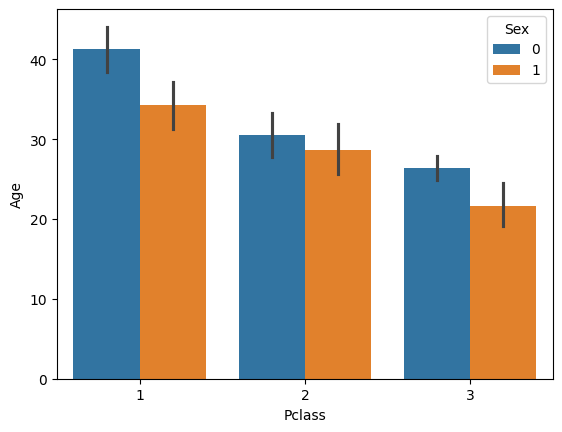

In [62]:
sns.barplot(x='Pclass',y='Age',hue='Sex',data=df)
plt.show()

* From the above graph, we can conclude that:
  * In Pclass 1- Average age of Male passengers is 41 and average age of Female passengers is 34.
  * In Pclass 2- Average age of Male passengers is 30 and average age of female passengers is 28.
  * In Pclass 3- Average age of Male Passengers is 26 and average age of female passengers is 21.

# LogisticRegression

In [63]:
new_df = pd.get_dummies(df,drop_first = True)
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [64]:
x = new_df.drop('Survived',axis=1)
y = new_df['Survived']

In [65]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
883,2,0,28.0,0,0,10.5000,0
884,3,0,25.0,0,0,7.0500,0
886,2,0,27.0,0,0,13.0000,0
887,1,1,19.0,0,0,30.0000,0


In [66]:
y

0      0
1      1
2      1
3      1
4      0
      ..
883    0
884    0
886    0
887    1
889    1
Name: Survived, Length: 684, dtype: int64

In [67]:
x_train,x_test,y_train,y_test = train_test_split (x,y,test_size =0.2,random_state=100)

In [68]:
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [69]:
y_pred = log.predict(x_test)

In [70]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1], dtype=int64)

In [71]:
y_test

512    1
770    0
266    0
717    1
576    1
      ..
706    1
574    0
799    0
271    1
346    1
Name: Survived, Length: 137, dtype: int64

In [72]:
log_accuracy =accuracy_score(y_pred,y_test)*100
print(f"Accuracy by using Logistic Regression: {log_accuracy}%")
print()

Accuracy by using Logistic Regression: 81.02189781021897%



In [73]:
con_matrix =confusion_matrix(y_pred,y_test)*100
con_matrix

array([[7200, 1700],
       [ 900, 3900]], dtype=int64)